In [266]:
# 1. Import thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [267]:
# 2. Đọc file xlsx và gắng index với giá Price


# # df = pd.read_excel('VCB.xlsx')
# df = pd.read_excel('ACB.xlsx')
df = pd.read_excel('MBB.xlsx')
df1=df.reset_index()['Price']

In [268]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
df=df.loc[::-1].reset_index(drop=True)

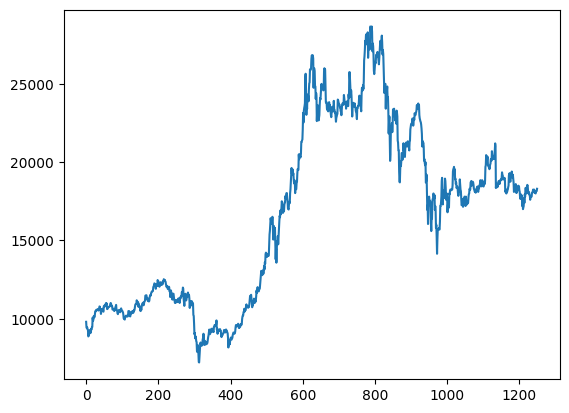

In [269]:
plt.plot(df1)

In [270]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [271]:
# # # 4. Chia train val test 9-1

# train_size = int(0.9 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]


In [272]:
# # # 4. Chia train val test 8-2

# train_size = int(0.8 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]


In [273]:
# # # 4. Chia train val test 7-3 

train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]


In [274]:
#in shape của từng tập dư liệu
print(train_data.shape, test_data.shape)

#in head
print(df1[:5])


(875, 1) (375, 1)
[[0.12103392]
 [0.1042819 ]
 [0.10204519]
 [0.1042819 ]
 [0.09869479]]


In [275]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [276]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [277]:
#in shape của từng tập dư liệu
print(X_train.shape, y_train.shape, X_test.shape, ytest.shape)


(871, 3) (871,) (371, 3) (371,)


In [278]:
# # 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape)

(871, 3, 1) (371, 3, 1)


In [279]:
#in dữ liệu
print(X_train[:1])

[[[0.12103392]
  [0.1042819 ]
  [0.10204519]]]


In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, LSTM #thêm thư viện Dropout để tránh overfitting
from tensorflow.keras.callbacks import EarlyStopping
#import adam
from tensorflow.keras.optimizers import Adam
#import thư viện mean_squared_error
from tensorflow.keras.losses import MeanSquaredError

#import cac metrics nhu mse,mae,rmse
from tensorflow.keras import metrics

#import cac loss function nhu mse,mae,rmse,mape
from tensorflow.keras import losses 

# Tạo model
model = Sequential()

input_shape = (time_step, 1)
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(32, input_shape=input_shape, return_sequences=True))
model.add(LSTM(16))


model.add(Dense(5))
model.add(Dropout(0.2)) 

model.add(Dense(1))

# Compile model với các tham số: optimizer, loss, metrics 
model.compile (loss= "mean_squared_error", optimizer=Adam(learning_rate=0.0001), metrics="mean_squared_error")
early_stop = EarlyStopping(monitor='val_loss', verbose=1,patience=50, restore_best_weights=True)
#mode = min tìm min của val_loss verbose = 1 in ra thông báo patience = 25 sau 25 epoch mà val_loss không giảm thì dừng lại
#baseline = 0.0001 nếu val_loss nhỏ hơn 0.0001 thì dừng lại
#restore_best_weights = True lấy lại trọng số tốt nhất




In [281]:
#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape)

(871, 3, 1) (371, 3, 1)


In [282]:
model.fit(X_train,y_train=(X_test,ytest),epochs=2000,batch_size=64,verbose=1,callbacks=[early_stop])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\DUNG\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DUNG\AppData\Local\Temp\ipykernel_35012\2409020087.py", line 1, in <module>
    model.fit(X_train,y_train=(X_test,ytest),epochs=2000,batch_size=64,verbose=1,callbacks=[early_stop])
  File "c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\DUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'y_train'

During handling of the above exception, another exception o

In [283]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


#in shape của từng tập dư liệu
print(train_predict.shape, y_pred.shape)

12/12 [==============================] - 0s 3ms/step
(871, 1) (371, 1)


In [284]:
#in shape của từng tập dư liệu y real
print(y_train.shape, ytest.shape)


(871,) (371,)


In [285]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


#in head
print(train_predict[:5])

[[7195.566 ]
 [7196.437 ]
 [7196.5576]
 [7196.6675]
 [7197.307 ]]


In [286]:
#Chuẩn hóa ngược lại yval và ytest và y_train sau khi đã reshape
y_train = y_train.reshape(y_train.shape[0],1)
ytest = ytest.reshape(ytest.shape[0],1)


y_train=scaler.inverse_transform(y_train)
ytest=scaler.inverse_transform(ytest)


#in head
print(y_train[:5])



[[9444.5]
 [9324.6]
 [9276.7]
 [8869.2]
 [8917.1]]


In [287]:
# 12. Đánh giá độ chính xác thuật toán bằng MAE va RMSE 
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Đánh giá độ chính xác thuật toán bằng MAE

testScore = mean_absolute_error(ytest,y_pred)
print('Test Score: %.3f MAE' % (testScore))



#Đánh giá độ chính xác thuật toán bằng RMSE

testScore = math.sqrt(mean_squared_error(ytest,y_pred))
print('Test Score: %.3f RMSE' % (testScore))



# Đánh giá độ chính xác thuật toán bằng MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

testScore = mean_absolute_percentage_error(ytest, y_pred)
print('Test Score: %.3f MAPE' % (testScore))




    
    

Test Score: 11729.513 MAE
Test Score: 11855.059 RMSE
Test Score: 61.820 MAPE


In [288]:
# # Danh gia model bang mat do MAPE
# def mean_absolute_percentage_error(y_true, y_pred):
#     return numpy.mean(numpy.abs((y_true - y_pred) / y_true)) * 100

# print('Train Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_train[:,0], train_predict[:,0]))
# print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(ytest[:,0], y_pred[:,0]))

# print('Train Score: %.2f MAPE' % (mean_absolute_percentage_error(y_train[:,0], train_predict[:,0])))
# print('Test Score: %.2f MAPE' % (mean_absolute_percentage_error(ytest[:,0], y_pred[:,0])))



In [289]:
# Chuẩn bị dữ liệu cho dự đoán tiếp theo

# Lấy time_step ngày cuối cùng của dữ liệu train để dự đoán 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(-1, 1)   #[-time_step:] lấy time_step phần tử cuối cùng của dữ liệu
print("x_input.shape = ", x_input.shape)

# Dự đoán 30 ngày tiếp theo
lst_output = []

i = 1  #biến đếm để dừng vòng lặp while
while(i <= 30):
    print("-----------------")
    #dua ve mang array 1 chieu
    list_input = x_input.reshape(1, -1)[0]
    #in ra x_input cuar ngày thứ i trong 30 ngày tiếp theo
    print("day ", i, " have input = ", list_input)

    # Dự đoán giá đóng của ngày tiếp theo
    x_input = x_input.reshape(1, time_step, 1) #reshape lại về dạng (1, time_step, 1)
    yhat = model.predict(x_input, verbose=0) #dự đoán giá đóng của ngày tiếp theo

    #in ra giá đóng của ngày thứ i trong 30 ngày tiếp theo
    print("day ",i," have output = ", yhat[0][0])

    #thêm giá đóng của ngày thứ i vào lst_output
    lst_output.append(yhat[0][0])

    #xoa phan tu dau tien cua x_input
    x_input = np.delete(x_input, 0)
    #them yhat vao x_input
    x_input = np.append(x_input, yhat[0][0])
    
    
    #tang bien dem len 1
    i = i + 1


x_input.shape =  (3, 1)
-----------------
day  1  have input =  [0.50994171 0.50994171 0.51693142]
day  1  have output =  -0.0023499972
-----------------
day  2  have input =  [ 0.50994171  0.51693142 -0.00235   ]
day  2  have output =  -0.001968208
-----------------
day  3  have input =  [ 0.51693142 -0.00235    -0.00196821]
day  3  have output =  -0.0011601775
-----------------
day  4  have input =  [-0.00235    -0.00196821 -0.00116018]
day  4  have output =  9.317375e-06
-----------------
day  5  have input =  [-1.96820800e-03 -1.16017752e-03  9.31737486e-06]
day  5  have output =  6.3638863e-06
-----------------
day  6  have input =  [-1.16017752e-03  9.31737486e-06  6.36388631e-06]
day  6  have output =  2.67143e-06
-----------------
day  7  have input =  [9.31737486e-06 6.36388631e-06 2.67142991e-06]
day  7  have output =  -3.336379e-08
-----------------
day  8  have input =  [ 6.36388631e-06  2.67142991e-06 -3.33637900e-08]
day  8  have output =  -1.8892267e-08
-----------------

In [290]:
#in ra 30 ngày tiếp theo
print("Du doan 30 ngay tiep theo: ", lst_output)

Du doan 30 ngay tiep theo:  [-0.0023499972, -0.001968208, -0.0011601775, 9.317375e-06, 6.3638863e-06, 2.67143e-06, -3.336379e-08, -1.8892267e-08, -6.1293752e-09, 1.11023024e-10, 5.3272352e-11, 1.4002806e-11, -3.5007771e-13, -1.4508367e-13, -3.182362e-14, 1.0596761e-15, 3.8522524e-16, 7.187471e-17, -3.1066894e-18, -1.0029924e-18, -1.6112863e-19, 8.876857e-21, 2.5704048e-21, 3.580178e-22, -2.4833196e-23, -6.5003334e-24, -7.8699214e-25, 6.824782e-26, 1.6250676e-26, 1.7073338e-27]


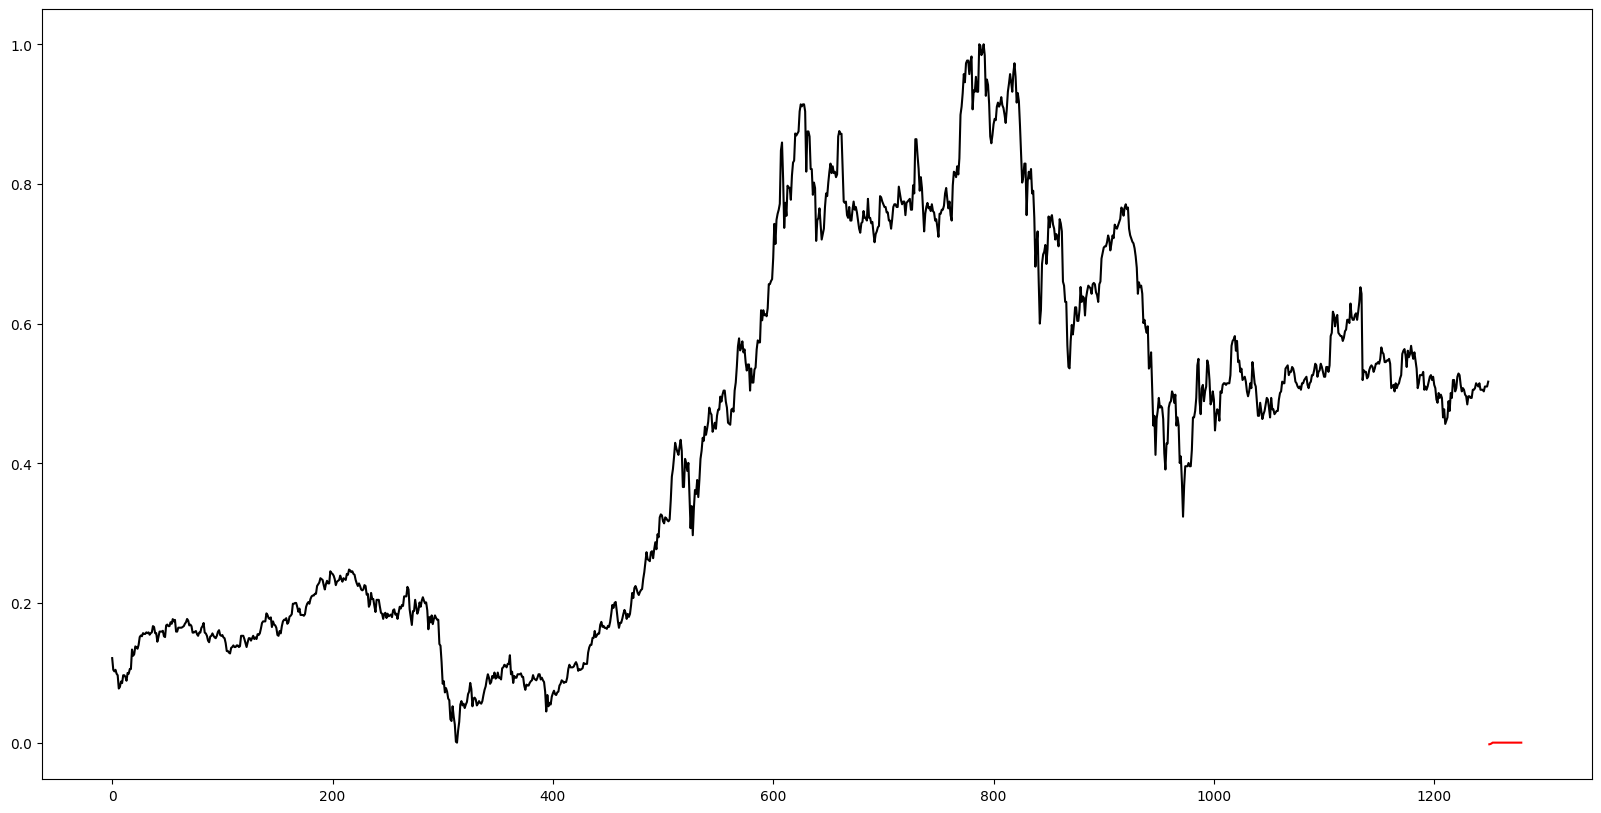

In [291]:
# Tạo mảng index tương ứng với các ngày
days = np.array(range(len(df), len(df) + len(lst_output)))

# Vẽ biểu đồ
plt.figure(figsize=(20,10))
plt.plot(days, lst_output, c='r', label='Next 30 days')
plt.plot(df1, c='black', label='Real data')
plt.show()


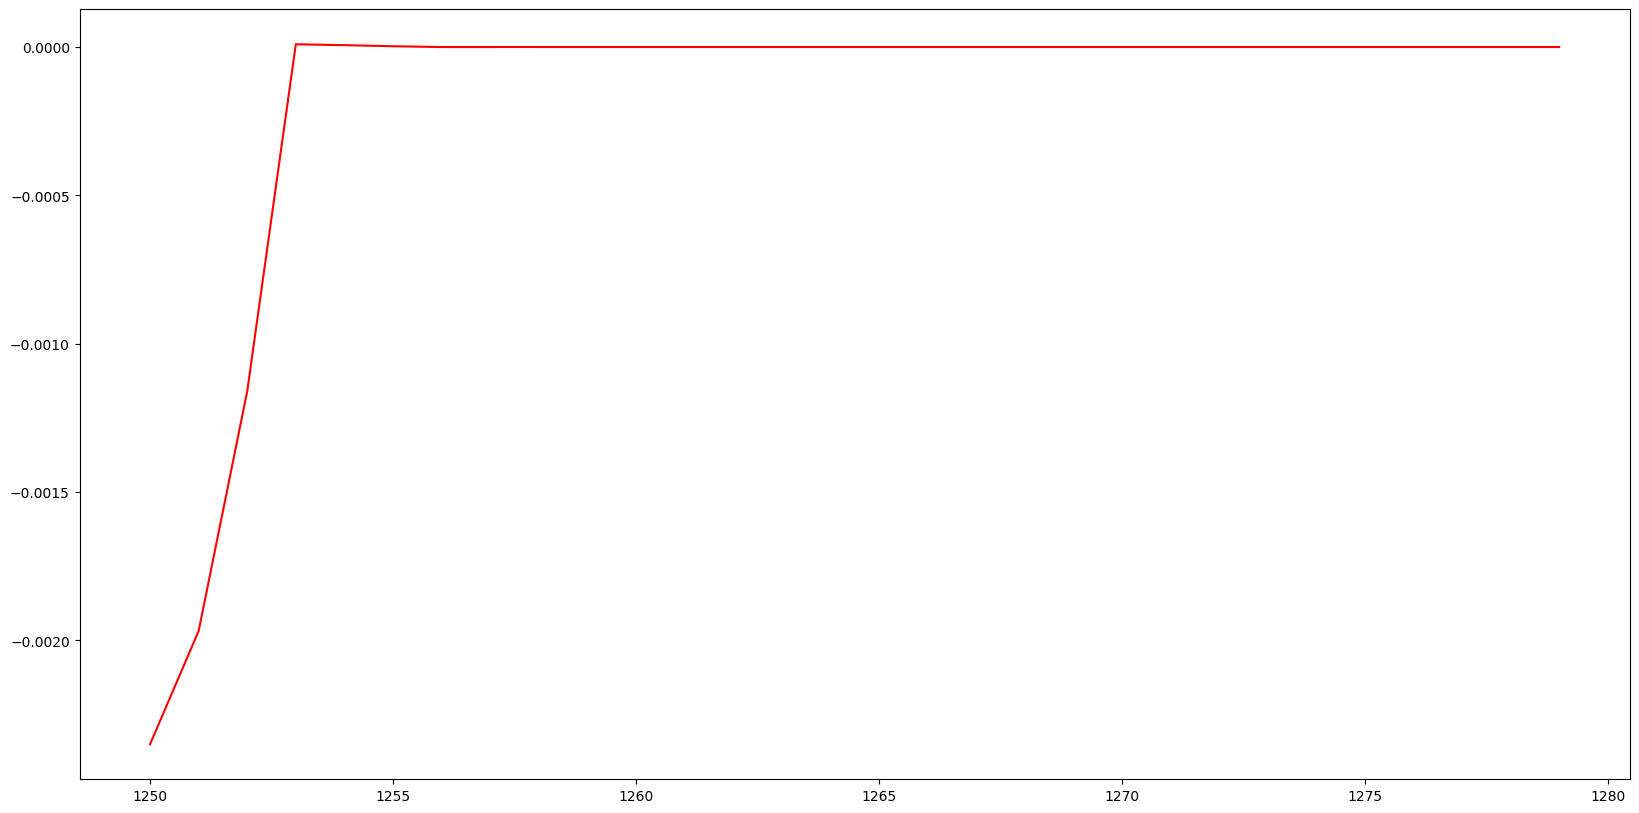

In [292]:
#vẽ next 30 days
plt.figure(figsize=(20,10))
plt.plot(days, lst_output, c='r', label='Next 30 days')
plt.show()

In [293]:
#chuẩn hóa ngược lại dữ liệu

train_data_inverse=scaler.inverse_transform(np.array(train_data).reshape(-1, 1))
test_data_inverse=scaler.inverse_transform(np.array(test_data).reshape(-1, 1))

next_30_days_inverse=scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# in dữ liệu
print(train_data_inverse[:5])
print(test_data_inverse[:5])
print(next_30_days_inverse[:5])

[[9804. ]
 [9444.5]
 [9396.5]
 [9444.5]
 [9324.6]]
[[20583.3]
 [20166.7]
 [20166.7]
 [20500. ]
 [21208.3]]
[[7156.169 ]
 [7164.3623]
 [7181.7026]
 [7206.8003]
 [7206.7363]]


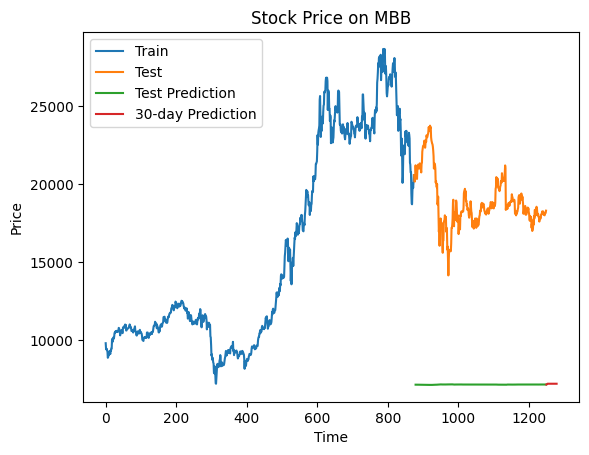

In [294]:
#vẽ y_train nối với ytest và y_val với index tương ứng

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)

train_predict_index = pd.RangeIndex(start=0, stop=train_predict.shape[0], step=1)
y_pred_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0], step=1)
predict30_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)

plt.plot(train_data_index, train_data_inverse)
plt.plot(test_data_index, test_data_inverse)
plt.plot(y_pred_index, y_pred)
plt.plot(predict30_data_index, next_30_days_inverse)



plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price on MBB')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()


